In [1]:
import os
print(os.getcwd()) #print working dir
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time
import json
from analyze_utilities import *
from dataset_utilities import create_cifar10_dataloaders
import pandas as pd
import copy
import seaborn as sns

C:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml\src


In [7]:
%run ./result_summary_uriya.ipynb
print(files_nml_2_layers)

Loading paths for pnml training...
loading paths for Twice universality with FGSM...
['./../results/deep_net/lr_0.001_ep_16/mnist_adversarial_results_20190404_130659/results_mnist_adversarial_20190404_130659.json', './../results/deep_net/lr_0.001_ep_16/mnist_adversarial_results_20190404_130840/results_mnist_adversarial_20190404_130840.json', './../results/deep_net/lr_0.001_ep_16/mnist_adversarial_results_20190404_131448/results_mnist_adversarial_20190404_131448.json', './../results/deep_net/lr_0.001_ep_16/mnist_adversarial_results_20190404_131904/results_mnist_adversarial_20190404_131904.json']


In [8]:
output_path = '../output/figures'
is_plot_title = False
is_save_fig = True

In [9]:
print(plt.style.available)
print(plt.rcParams)
plt.style.use(['seaborn-darkgrid', 'seaborn-paper'])
label_size = 16
tick_size = 14
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=label_size)
plt.rc('axes', labelsize=label_size)
plt.rc('xtick', labelsize=tick_size)
plt.rc('ytick', labelsize=tick_size)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: k
axes.facecolor: w
axes.formatter.limits: [-7, 7]
axes.formatter.min_exponent: 0
axes.formatter.offset_thre

ytick.right: False


# PNML Vs. ERM Performence
PNML is as training is as following:
1. Train base model with all trainset
2. Freeze first layers (only enable updates of layer 5,6 in resnet20)
3. For each test sample:
    1. For each label:
        1. Add the test sample with the label to trainset
        2. Train for 10 epochs the model
        3. Keep probability of the test sample label which it was trained with
    2. Take all save probabilities and normalize them.
    3. Report the new probability assignment

In [62]:
%run ./result_summary_uriya.ipynb
print(M23_path)
calc_erm_and_genie_stats(M11_path)

Loading paths for pnml training...
loading paths for Twice universality with FGSM...
['./../results/deep_net/twice_univ/M23/results_mnist_adversarial_20190416_165303.json']
                 genie
acc           0.970000
mean loss     0.054351
std loss      0.189533
mean entropy  0.102497
100
                   erm
acc           0.950000
mean loss     0.103554
std loss      0.354911
mean entropy  0.117349
100


In [63]:
# Print acc and mean loss
tic = time.time()
result_df, statistics_df = load_results_to_df(refine_path19)
print('result_df: loaded in {0:.2f} [s]'.format(time.time() - tic))
print(statistics_df.transpose())
print(result_df.shape[0])

result_df: loaded in 0.07 [s]
            acc  mean loss  std loss  mean entropy
nml    0.905473   0.096929  0.202397      0.133398
erm    0.905473   0.097596  0.256597      0.093553
genie  0.935323   0.061303  0.171159      0.077818
201


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')


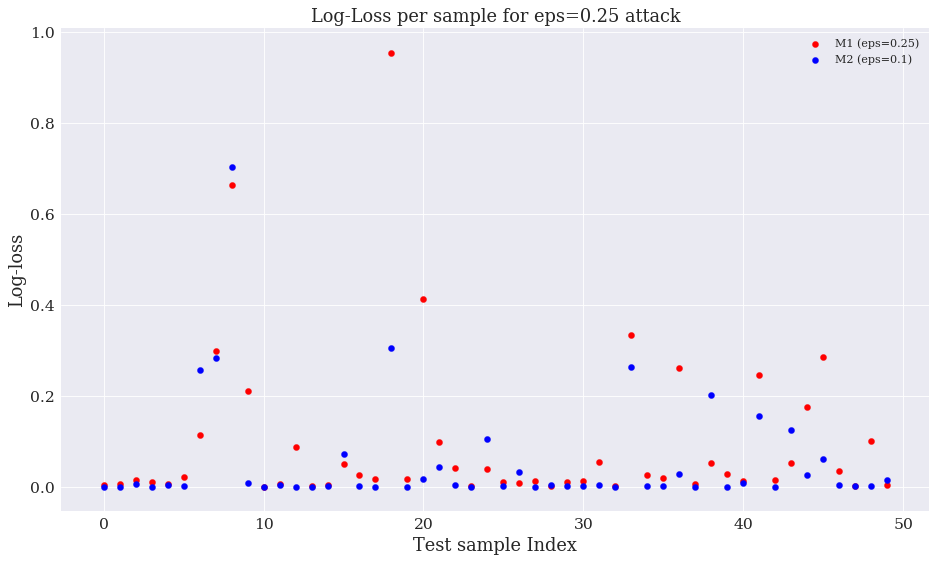

In [22]:
# Log-Loss vs sample index graph
ii = list(range(0,50)) # index range to display



result_df1, statistics_df = load_results_to_df(M14_path)
result_df2, statistics_df = load_results_to_df(M24_path)
result_df1 = result_df1.sort_index(axis=0)
result_df2 = result_df2.sort_index(axis=0)
print(result_df1.index[ii])
fig=plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
s1 = plt.scatter(result_df1.index[ii], result_df1['nml_loss'][ii], c="red")
s2 = plt.scatter(result_df2.index[ii], result_df2['nml_loss'][ii], c="blue")
plt.xlabel('Test sample Index')
plt.ylabel('Log-loss')
plt.legend((s1, s2),
           ('M1 (eps=0.25)', 'M2 (eps=0.1)'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=10)
plt.title('Log-Loss per sample for eps=0.25 attack')
plt.show()

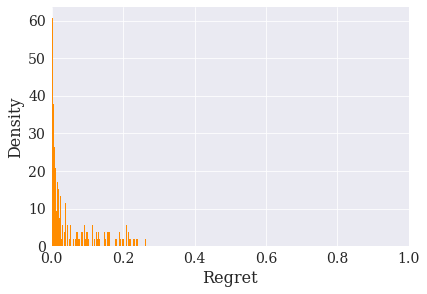

FileNotFoundError: [Errno 2] No such file or directory: '../output/figures\\logloss_hist.jpg'

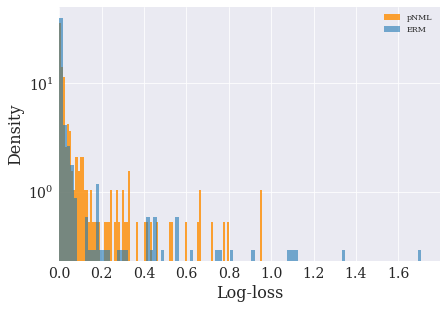

In [23]:
# Regret histogram
bins = 100
plt.hist(result_df['log10_norm_factor'], density=True,
         label='pNML', bins=bins, color='darkorange')
plt.xlim([-0.0001, 1])
plt.title('Regret Histogram') if is_plot_title else None
plt.xlabel('Regret')
plt.ylabel('Density')
# plt.savefig(os.path.join(output_path, 'regret_hist.jpg'), dpi=200,
#             bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

# logloss histogram
bins = 100
plt.hist(result_df['nml_loss'], bins=bins, alpha=0.8,
         label='pNML', density=True, color='darkorange')
plt.hist(result_df['erm_loss'], bins=bins,
         alpha=0.6, label='ERM', density=True)
plt.title('Logloss Histogram') if is_plot_title else None
plt.xlabel('Log-loss')
plt.ylabel('Density')
plt.yscale('log')
plt.xlim(left=0)
plt.legend()
plt.savefig(os.path.join(output_path, 'logloss_hist.jpg'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()


C:\DevPrograms\Anaconda2\envs\deep_pnml2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\DevPrograms\Anaconda2\envs\deep_pnml2\lib\site-packages\matplotlib\colors.py:1133: RuntimeWarning: invalid value encountered in greater
  masked = np.abs(a) > self.linthresh


FileNotFoundError: [Errno 2] No such file or directory: '../output/figures\\loss_vs_regret_jointplot.jpg'

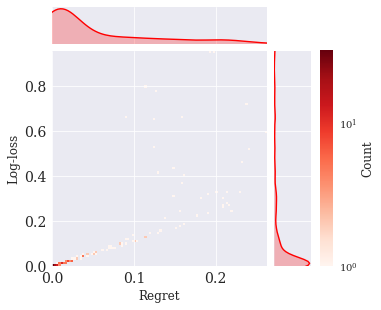

In [24]:
x_data = list(result_df['log10_norm_factor'])
y_data = list(result_df['nml_loss'])
g = sns.JointGrid(x=x_data,  y=y_data)
g.plot_marginals(sns.kdeplot, shade=True, color='red')
g.plot_joint(plt.hist2d, bins=[100, 100], norm=mpl.colors.SymLogNorm(0.1),
             cmin=1, cmap=plt.cm.Reds)
g.ax_joint.grid(True)
g.ax_joint.set_ylabel('Log-loss', fontsize=label_size-4)
g.ax_joint.set_xlabel('Regret', fontsize=label_size-4)

# make new ax object for the cbar
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbar_ax = g.fig.add_axes([.82, 0.2, .03, .5])  # x, y, width, height
plt.colorbar(cax=cbar_ax).set_label(label='Count', fontsize=label_size-4)
cbar_ax.tick_params(labelsize=10)
plt.savefig(os.path.join(output_path, 'loss_vs_regret_jointplot.jpg'), dpi=200,
            bbox_inches='tight',  bbox_extra_artists=(cbar_ax,),) if is_save_fig else None
plt.show()

In [ ]:
subsample = 5

x_data = list(result_df['log10_norm_factor'][::subsample])
y_data = list(result_df['nml_loss'][::subsample])
g = sns.JointGrid(x=x_data,  y=y_data,  xlim=(0, 0.8), ylim=(0,14))
g.plot_marginals(sns.kdeplot, shade=True, color='orange')
g.plot_joint(plt.scatter, c='orange',  edgecolor="white", label='pNML', s=10)
# add scatter of erm
g.x = result_df['log10_norm_factor'][::subsample]
g.y = result_df['erm_loss'][::subsample]
g.plot_joint(plt.scatter, c='C0', label='ERM', s=10)

g.ax_joint.grid(True)
g.ax_joint.set_ylabel('Log-loss', fontsize=label_size-2)
g.ax_joint.set_xlabel('Regret', fontsize=label_size-2)

plt.legend(prop={'size': 10})
plt.savefig(os.path.join(output_path, 'loss_vs_regret_jointplot_scatter.jpg'), dpi=200,
            bbox_inches='tight',  bbox_extra_artists=(cbar_ax,),) if is_save_fig else None
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../output/figures\\correct_incorrect_hist.jpg'

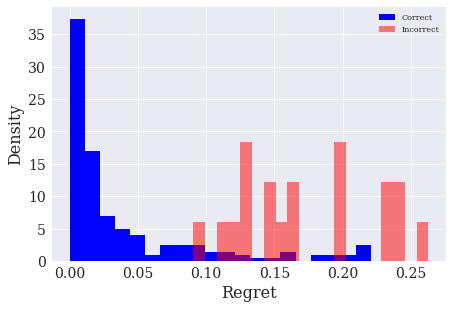

In [25]:
# Plot histogram of correct vs incorrect
correct_norm_factor = result_df['log10_norm_factor'][result_df['nml_is_correct'] == True]
incorrect_norm_factor = result_df['log10_norm_factor'][result_df['nml_is_correct'] == False]

bins = 20

plt.hist(correct_norm_factor, alpha=1, bins=bins,
         density=True, color='blue', label='Correct')
plt.hist(incorrect_norm_factor, alpha=0.5, bins=bins,
         density=True, color='red', label='Incorrect')
plt.title(
    'Regret Histogram with Correct and Incorrect Separation') if is_plot_title else None
plt.xlabel('Regret')
plt.ylabel('Density')
plt.legend()
plt.savefig(os.path.join(output_path, 'correct_incorrect_hist.jpg'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

print()
print('Correct = %d, Incorrect = %d ' %
      (correct_norm_factor.shape[0], incorrect_norm_factor.shape[0]))
print('Mean [correct, incorrect]={}'.format(
    [correct_norm_factor.mean(), incorrect_norm_factor.mean()]))

# Compose Regret based Estimator

In [ ]:
#  Construct best loss based on normalization factor
threshold_list = np.linspace(np.finfo(float).eps, 1, 99)
acc_list = []
acc_erm_list = []
cdf_list = []
nml_thresh_loss_list = []
erm_thresh_loss_list = []
for threshold in threshold_list:
    df = result_df[result_df['log10_norm_factor'] < threshold]

    # loss
    nml_thresh_loss_list.append(df['nml_loss'].mean())
    erm_thresh_loss_list.append(df['erm_loss'].mean())

    # Acc
    acc_single = np.sum(df['nml_is_correct'] == True) / \
        (df.shape[0] + np.finfo(float).eps)
    acc_list.append(acc_single)
    acc_erm_single = np.sum(df['erm_is_correct'] == True) / \
        (df.shape[0] + np.finfo(float).eps)
    acc_erm_list.append(acc_erm_single)

    cdf_single = df.shape[0] / result_df.shape[0]
    cdf_list.append(cdf_single)

In [ ]:
gs = gridspec.GridSpec(3, 1)
# Acc
acc_color = 'royalblue'
ax1 = plt.subplot(gs[0])
ax1.plot(threshold_list, acc_list)
ax1.set_ylabel('Acc.')

labels = [item.get_text() for item in ax1.get_xticklabels()]
empty_string_labels = [''] * len(labels)
ax1.set_xticklabels(empty_string_labels)

# Loss
loss_color = 'green'
ax2 = plt.subplot(gs[1])
ax2.plot(threshold_list, nml_thresh_loss_list)
ax2.set_ylabel('Log-loss')
labels = [item.get_text() for item in ax2.get_xticklabels()]
empty_string_labels = [''] * len(labels)
ax2.set_xticklabels(empty_string_labels)

# CDF
ax3 = plt.subplot(gs[2])
ax3.plot(threshold_list, cdf_list)
ax3.set_yticks(np.linspace(0, 1, 6))
ax3.set_xlabel('Regret threshold')
ax3.set_ylabel('CDF')

# Save and show
plt.savefig(os.path.join(output_path, 'regret_based_calss_all.jpg'),
            dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

In [ ]:
gs = gridspec.GridSpec(3, 1)
# Acc
acc_color = 'royalblue'
ax1 = plt.subplot(gs[0])
ax1.plot(threshold_list, acc_erm_list, '-*' , label='ERM', color='C0')
ax1.plot(threshold_list, acc_list, label='pNML', color='orange')
ax1.set_ylabel('Acc.')
plt.legend(fontsize=12)

labels = [item.get_text() for item in ax1.get_xticklabels()]
empty_string_labels = [''] * len(labels)
ax1.set_xticklabels(empty_string_labels)

# Loss
loss_color = 'green'
ax2 = plt.subplot(gs[1])
ax2.plot(threshold_list, erm_thresh_loss_list, '-*' , label='ERM', color='C0')
ax2.plot(threshold_list, nml_thresh_loss_list, label='pNML', color='orange')
ax2.set_ylabel('Log-loss')
labels = [item.get_text() for item in ax2.get_xticklabels()]
empty_string_labels = [''] * len(labels)
ax2.set_xticklabels(empty_string_labels)

# CDF
ax3 = plt.subplot(gs[2])
ax3.plot(threshold_list, cdf_list, color='orange')
ax3.set_yticks(np.linspace(0, 1, 6))
ax3.set_xlabel('Regret threshold')
ax3.set_ylabel('CDF')

# Save and show
plt.savefig(os.path.join(output_path, 'regret_based_class_all_with_erm.jpg'),
            dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

pd.DataFrame({'CDF': cdf_list, 'Regret thresh': threshold_list, 'acc': acc_list})

# Out  of Disterbution

In [ ]:
# Load svhn and noise
results_df_cifar10, statistic_cifar10 = load_results_to_df(files_nml_2_layers)
print('Cifar10: loaded %d keys' % results_df_cifar10.shape[0])
results_df_noise, statistic_noise = load_results_to_df(
    files_noise, is_out_of_dist=True)
print('Noise: loaded %d keys' % results_df_noise.shape[0])
results_df_svhn, statistic_svhn = load_results_to_df(
    files_svhn, is_out_of_dist=True)
print('SVHN: loaded %d keys' % results_df_svhn.shape[0])

In [ ]:
# Plot
bins = 20
plt.hist(results_df_cifar10['log10_norm_factor'], alpha=1, density=True, label='CIFAR10', bins=bins)
plt.hist(results_df_svhn['log10_norm_factor'], alpha=0.5, density=True, label='SVHN', bins=bins)
plt.hist(results_df_noise['log10_norm_factor'], alpha=0.5, density=True, label='Noise', bins=bins)
plt.ylabel('Density')
plt.xlabel('Regret')
plt.title('Out Of Distribution Regret Histogram') if is_plot_title else None
plt.legend()
plt.savefig(os.path.join(output_path, 'out_of_dist_hist.jpg'),
            dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()
print('Mean: cifar, svhn, noise: {}'.format([results_df_cifar10['log10_norm_factor'].mean(),
                                             results_df_svhn['log10_norm_factor'].mean(),
                                             results_df_noise['log10_norm_factor'].mean()]))


## Entropy 

In [ ]:
# Plot entropy
objects = ('CIFAR10', 'SVHN', 'Noise')
y_pos = np.arange(len(objects))
bar_width = 0.35
opacity = 0.8

plt.bar(y_pos - bar_width / 2, [statistic_cifar10.loc['mean entropy']['nml'],
                                statistic_svhn.loc['mean entropy']['nml'],
                                statistic_noise.loc['mean entropy']['nml']],
        bar_width, alpha=0.5, color='darkorange', label='pNML')

plt.bar(y_pos + bar_width / 2, [statistic_cifar10.loc['mean entropy']['erm'],
                                statistic_svhn.loc['mean entropy']['erm'],
                                statistic_noise.loc['mean entropy']['erm']],
        bar_width, alpha=0.5, color='blue', label='ERM')

plt.xticks(y_pos, objects)
plt.ylabel('Entropy')
plt.title('Entropy of out of distribution sampels') if is_plot_title else None
plt.legend()
plt.xlabel('Testset')
plt.savefig(os.path.join(output_path, 'out_of_dist_entropy.jpg'),
            dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

print()
print('SVHN:')
print(statistic_svhn)

print()
print('Noise:')
print(statistic_noise)


##  Evaluation Metrices

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from scipy.ndimage.filters import gaussian_filter
import math
from scipy.stats import ks_2samp


def bhattacharyya(a, b):
    return -np.log(np.sum(np.sqrt(a * b)))


def kl(p, q):
    p = np.asarray(p, dtype=np.float)
    p[p == 0] = np.finfo(float).eps

    q = np.asarray(q, dtype=np.float)
    q[q == 0] = np.finfo(float).eps
    return np.sum(np.where(p > np.finfo(float).eps, - p * np.log(q / p), 0))


def kl_distance(a, b):
    return 0.5*(kl(a, b) + kl(b, a))


def histogram_and_smooth(data, nbins=10, sigma=1):
    hist = np.histogram(data, bins=nbins)[0]
    hist_smooth = gaussian_filter(hist, sigma)
    hist_smooth_normalized = hist_smooth/np.sum(hist_smooth)
    return hist_smooth_normalized


def calc_p_lamb(a_distribution, b_distribution, lamb):
    """
    Calc P_lamb distribution: P_lambda = a^lamb * b^(1-lamb) / Normalize
    """
    p_lamb = np.power(a_distribution, lamb) * np.power(b_distribution, 1-lamb)
    p_lamb /= np.sum(p_lamb)
    return p_lamb


def find_lamb_star(a_distribution, b_distribution):
    """
    Find lambda^* for which D(a||P_lambda) = D(b||P_lambda) 
    """
    distance = []
    lamb_list = np.flip(np.linspace(0, 1, 20))

    # For each lambda calculate the Distance D(a||P_lambda) - D(b||P_lambda)
    for lamb in lamb_list:
        p_lamb = calc_p_lamb(a_distribution, b_distribution, lamb)
        distance.append(kl(p_lamb, a_distribution) -
                        kl(p_lamb, b_distribution))

    # Find lambda for which the the distance is zero
    lamb_star = np.interp(0.0, distance, lamb_list)

    # Get the KL value in that lamb_star: D(a||P_lambda)
    p_lamb_star = calc_p_lamb(a_distribution, b_distribution, lamb_star)
    return kl(p_lamb_star, a_distribution)


def calc_performance_in_out_dist(true_ind, score_ind):
    """
    Calculate evaluation matrics
    """
    score_ood = 1 - np.array(score_ind)
    true_ood = 1 - np.array(true_ind)

    true_len = np.sum(true_ind)
    false_len = len(true_ind) - true_len
    sample_weight = [1] * true_len + [true_len / false_len] * false_len

    # AUROC
    res_auc = roc_auc_score(true_ood, score_ood, sample_weight=sample_weight)

    # AUPR-Out
    ap_out = average_precision_score(
        true_ood, score_ood, sample_weight=sample_weight)

    # AUPR-In
    ap_in = average_precision_score(
        true_ind, score_ind, sample_weight=sample_weight)

    # KL distance
    score_ind = np.array(score_ind)
    true_ind = np.array(true_ind)
    in_hist = histogram_and_smooth(
        score_ind[true_ind == True], nbins=20, sigma=0)
    out_hist = histogram_and_smooth(
        score_ind[true_ind == False], nbins=20, sigma=0)
    kl_dist = kl_distance(in_hist, out_hist)

    # Bhattacharyya distance
    bhatt_dist = bhattacharyya(in_hist, out_hist)

    # P_lambda
    kl_in_p_lambda = find_lamb_star(in_hist, out_hist)

    ood_df = pd.DataFrame({
        # 'AUROC': [res_auc], 'AP-In': [ap_in], 'AP-Out': [ap_out],
        'KL Divergence': [kl_dist], 'Bhattach Distance': [bhatt_dist],
        'KL in P_lamb': [kl_in_p_lambda]
    })

    return ood_df

In [ ]:
from numpy import inf
ind_df = results_df_cifar10
for (ooo_dataset, ood_df) in zip(['Noise', 'SVHN'], [results_df_noise, results_df_svhn]):
    upsample_ratio = int(ind_df.shape[0] / ood_df.shape[0])
    print('Upsample ratio: ', upsample_ratio)

    # Baseline Max prob of ERM
    y_score_ind = ind_df[['erm_' + str(x) for x in range(10)]].max(axis=1).tolist() + \
        ood_df[['erm_' + str(x) for x in range(10)]].max(axis=1).tolist()
    y_true_ind = [True] * ind_df.shape[0] + [False] * ood_df.shape[0]
    ood_df_erm_baseline = calc_performance_in_out_dist(y_true_ind, y_score_ind)
    ood_df_erm_baseline = ood_df_erm_baseline.rename(index={0: 'Max Prob'})
    
    # Baseline p1/p2 of ERM
    p1_ind = np.sort(ind_df[['erm_' + str(x) for x in range(10)]])[:,-2:][:,1]
    p2_ind = np.sort(ind_df[['erm_' + str(x) for x in range(10)]])[:,-2:][:,0]
    p1_p2_ind = 1-p2_ind/p1_ind #np.clip(p1_ind/p2_ind, 0, 10**6) 
    p1_ood = np.sort(ood_df[['erm_' + str(x) for x in range(10)]])[:,-2:][:,1]
    p2_ood = np.sort(ood_df[['erm_' + str(x) for x in range(10)]])[:,-2:][:,0]
    p1_p2_ood= 1-p2_ood/p1_ood#np.clip(p1_ood/p2_ood, 0, 10**6) 


    y_score_ind = list(p1_p2_ind) + list(p1_p2_ood)
    y_true_ind = [True] * ind_df.shape[0] + [False] * ood_df.shape[0]
    ood_df_erm_baseline_2 = calc_performance_in_out_dist(y_true_ind, y_score_ind)
    ood_df_erm_baseline_2 = ood_df_erm_baseline_2.rename(index={0: '1-p2/p1'})

    # Regret based
    y_score_ind = (1.0 - ind_df['log10_norm_factor']).tolist() + \
                  (1.0 - ood_df['log10_norm_factor']).tolist()
    y_true_ind = [True] * ind_df.shape[0] + [False] * ood_df.shape[0]

    ood_df_ours = calc_performance_in_out_dist(y_true_ind, y_score_ind)
    ood_df_ours = ood_df_ours.rename(index={0: 'Regret'})

    # Summary
    merged_pd = pd.concat([ood_df_erm_baseline, ood_df_erm_baseline_2, ood_df_ours])
    print('%s:' % ooo_dataset)
    print(merged_pd)
    print()

    # Histogram based on Ouf Of Dist confidence
    f, axarr = plt.subplots(3, 1)
    nbins = 20
    axarr[0].hist(ind_df[['erm_' + str(x) for x in range(10)]
                         ].max(axis=1),  bins=nbins, alpha=1.0, density=True, label='CIFAR10')
    axarr[0].hist(ood_df[['erm_' + str(x) for x in range(10)]
                         ].max(axis=1),  bins=nbins, alpha=0.5, density=True, label=ooo_dataset)
    axarr[0].set_xlabel('Max Probabiliy')
    axarr[0].set_ylabel('Density')
    axarr[0].legend()

    axarr[1].hist(list(p1_p2_ind), bins=nbins,
                  alpha=1.0, density=True, label='In-Dist')
    axarr[1].hist(list(p1_p2_ood),bins=nbins,
                  alpha=0.5, density=True, label=ooo_dataset)
    axarr[1].set_xlabel(r'$1-p_2 / p_1$')
    axarr[1].set_ylabel('Density')       

    axarr[2].hist(1.0 - ind_df['log10_norm_factor'], bins=nbins,
                  alpha=1.0, density=True, label='In-Dist')
    axarr[2].hist(1.0 - ood_df['log10_norm_factor'],bins=nbins,
                  alpha=0.5, density=True, label=ooo_dataset)
    axarr[2].set_xlabel('1 - Regret')
    axarr[2].set_ylabel('Density')
    
    f.subplots_adjust(hspace=0.6)
    plt.savefig(os.path.join(output_path, 'out_of_dist_detection_%s.jpg' % ooo_dataset),
            dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
    plt.show()

In [ ]:
# p1 = np.array(ind_df[['erm_' + str(x) for x in range(10)]].max(axis=1))
p1 = np.sort(ind_df[['erm_' + str(x) for x in range(10)]])[:,-2:][:,1]
p2 = np.sort(ind_df[['erm_' + str(x) for x in range(10)]])[:,-2:][:,0]
print('p1')
print(p1)
print('p2')
print(p2)

In [ ]:
bins = 10**(np.arange(0,6))
bins

# Random labels

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import json
from analyze_utilities import *
from dataset_utilities import create_cifar10_dataloaders
import pandas as pd
import copy

% run ./result_summary.ipynb

In [ ]:
# Count param difference between WideResnet and Resnet20
from wide_resnet import WideResNet
from resnet import resnet20

model = WideResNet()
wide_resnet_params = sum(p.numel() for p in model.parameters())
model = resnet20()
resnet20_params = sum(p.numel() for p in model.parameters())
print('[WideResnet Resnet20]=[{} {}]'.format(
    wide_resnet_params, resnet20_params))
print('Ratio {}]'.format(wide_resnet_params / resnet20_params))

In [ ]:
# Extract the log normalization factor
random_df = pd.DataFrame(columns=['nml_acc', 'erm_acc', 'genie_acc',
                                  'log10_norm_factor',
                                  'nml_mean_loss', 'erm_mean_loss', 'genie_mean_loss'])

for (rand_prob_single, file_random) in zip(random_prob, files_random):
    results_df, statistics_df = load_results_to_df(file_random)
    print('Random Prob = {}, num={}'.format(
        rand_prob_single, results_df.shape[0]))
    random_df.loc[rand_prob_single] = [statistics_df.loc['acc']['nml'],
                                       statistics_df.loc['acc']['erm'],
                                       statistics_df.loc['acc']['genie'],
                                       results_df['log10_norm_factor'].mean(),
                                       statistics_df.loc['mean loss']['nml'],
                                       statistics_df.loc['mean loss']['erm'],
                                       statistics_df.loc['mean loss']['genie']]
print('Random df:')
random_df.transpose().round(2)

In [ ]:
# Plot
plt.plot(random_df.index.values,
         random_df['log10_norm_factor'], '--*', label='NML')
plt.ylabel('Regret')
plt.xlabel('Prob of random')
plt.title('Regret Vs. Prob to be Random') if is_plot_title else None
# plt.savefig(os.path.join(output_path, 'random_prob_regret.jpg'),
#             dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

In [ ]:
# Check noisy data
plt.plot(random_df.index.values, random_df['erm_mean_loss'], label='ERM')
plt.plot(random_df.index.values, random_df['nml_mean_loss'], label='pNML')
plt.plot(random_df.index.values, random_df['genie_mean_loss'], label='Genie')
plt.title('Loss of random labels') if is_plot_title else None
plt.ylabel('Loss')
plt.xlabel('Prob to be Random')
plt.legend()
plt.savefig(os.path.join(output_path, 'random_prob_loss.jpg'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

plt.plot(random_df.index.values, random_df['erm_acc'], label='ERM')
plt.plot(random_df.index.values, random_df['nml_acc'], label='pNML')
plt.plot(random_df.index.values, random_df['genie_acc'], label='Genie')
plt.title('Acc of random labels') if is_plot_title else None
plt.ylabel('Acc')
plt.xlabel('Prob to be Random')
plt.legend()
plt.savefig(os.path.join(output_path, 'random_prob_acc.jpg'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline
def smooth_graph(x, y, pow=1):

    x_smooth = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=pow)
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth

# Check noisy data
color = 'royalblue'
fig, ax1 = plt.subplots()

x, y = smooth_graph(random_df.index.values, random_df['erm_mean_loss'])
ax1.plot(x, y, label='ERM log-loss')

x, y = smooth_graph(random_df.index.values, random_df['nml_mean_loss'])
ax1.plot(x, y, label='pNML log-loss')

ax1.set_ylabel('Loss')
ax1.set_ylabel('Log-loss')
ax1.set_xlabel('Prob to be random')

# # Plot
# ax2 = ax1.twinx()
# x, y = smooth_graph(random_df.index.values, random_df['log10_norm_factor'])
# ax2.plot(x, y, color='indianred', label='Regret')
# ax2.set_ylabel('Regret')

# # ax2 ticks
# l = ax1.get_ylim()
# l2 = ax2.get_ylim()


# def f(x): return l2[0]+(x-l[0])/(l[1]-l[0])*(l2[1]-l2[0])


# ticks = f(ax1.get_yticks())
# ax2.yaxis.set_major_locator(mpl.ticker.FixedLocator(ticks))
# ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))

# # Legends
# ax1.legend(loc=(.04, .86), frameon=False)
# ax2.legend(loc=(.04, .94), frameon=False)
ax1.legend()

plt.savefig(os.path.join(output_path, 'random_prob_regret_and_loss.jpg'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

# Twice Universality

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import json
from analyze_utilities import *
from dataset_utilities import create_cifar10_dataloaders
import pandas as pd
import copy
import collections

%run ./result_summary_uriya.ipynb

Loading paths for pnml training...
loading paths for Twice universality with FGSM...


### Cifar

In [ ]:
print('load 0 layers')
nml_0_df = result_dict_to_erm_df(load_dict_from_file_list(files_nml_2_layers))
print('load 2 layers')
nml_2_df = result_dict_to_nml_df(load_dict_from_file_list(files_nml_2_layers))
print('load 7 layers')
nml_7_df = result_dict_to_nml_df(load_dict_from_file_list(files_nml_7_layers))

# Create twice df dataframe
twice_df, idx_common = create_twice_univ_df([nml_0_df, nml_2_df, nml_7_df])
twice_statistic_df = calc_statistic_from_df_single(twice_df).rename(columns={'statistics': 'Twice Univ'})

# Print statistic of all
twice_statistic_df = calc_statistic_from_df_single(twice_df).rename(columns={'statistics': 'Twice Univ'})
nml_0_statistic_df = calc_statistic_from_df_single(nml_0_df.loc[idx_common]).rename(columns={'statistics':
                                                                                                 '0 layers'})
nml_2_statistic_df = calc_statistic_from_df_single(nml_2_df.loc[idx_common]).rename(columns={'statistics':
                                                                                                 '2 layers'})
nml_7_statistic_df = calc_statistic_from_df_single(nml_7_df.loc[idx_common]).rename(columns={'statistics':
                                                                                                 '7 layers'})
#--
print(pd.concat([twice_statistic_df,
                 nml_0_statistic_df,
                 nml_2_statistic_df,
                 nml_7_statistic_df], axis=1, join='inner').transpose())


### MNIST

In [18]:
twice_stats_df_concat = pd.DataFrame([])
M1_stats_df_concat = pd.DataFrame([])
M2_stats_df_concat = pd.DataFrame([])
bagging_stats_df_concat = pd.DataFrame([])
risk_min_stats_df_concat = pd.DataFrame([])

for i in range(len(M1_list)):
    M1_path = M1_list[i]
    M2_path = M2_list[i]

    M1 = result_dict_to_nml_df(load_dict_from_file_list(M1_path))
    print('loaded 0 layers MNIST, {} samples'.format(M1.shape[0]))
    M2 = result_dict_to_nml_df(load_dict_from_file_list(M2_path))
    print('loaded 1 layers MNIST, {} samples'.format(M2.shape[0]))

    # Create twice_df dataframe
    twice_df, idx_common = create_twice_univ_df([M1, M2])

    # create genie dataframe for twice_univ
    genie_tu_df, _ = create_genie_tu_df([M1, M2])
    
    # create bagging dataframe
    bagging_df, _ = create_bagging_df([M1, M2])
    
    # create risk minimizer dataframe
    risk_min_df, _ = create_risk_minimizer_df([M1, M2])
    
    # Print statistic of all
    twice_statistic_df = calc_statistic_from_df_single(twice_df).rename(columns={'statistics': 'Twice Univ'})
    twice_stats_df_concat = pd.concat([twice_stats_df_concat, twice_statistic_df.transpose()])
    
    genie_statistic_df = calc_statistic_from_df_single(genie_tu_df).rename(columns={'statistics': 'Genie Twice Univ'})
    counter_genie_sel_df = collections.Counter(genie_tu_df["selected_df"])
    
    bagging_stats_df = calc_statistic_from_df_single(bagging_df).rename(columns={'statistics': 'Bagging'})
    bagging_stats_df_concat = pd.concat([bagging_stats_df_concat, bagging_stats_df.transpose()])
    
    risk_min_stats_df = calc_statistic_from_df_single(risk_min_df).rename(columns={'statistics': 'Risk minimizer'})
    risk_min_stats_df_concat = pd.concat([risk_min_stats_df_concat, risk_min_stats_df.transpose()])
    counter_riskmin_sel_df = collections.Counter(risk_min_df["selected_df"])
    
    M1_statistic_df = calc_statistic_from_df_single(M1.loc[idx_common]).rename(columns={'statistics':
                                                                                                     'M1_nml'})
    M1_stats_df_concat = pd.concat([M1_stats_df_concat, M1_statistic_df.transpose()])
    M2_statistic_df = calc_statistic_from_df_single(M2.loc[idx_common]).rename(columns={'statistics':
                                                                                                     'M2_nml'})
    M2_stats_df_concat = pd.concat([M2_stats_df_concat, M2_statistic_df.transpose()])

    _, statistics_df1 = load_results_to_df(M1_path, idx=idx_common )
    statistics_df1 = statistics_df1.rename(columns={'erm': 'M1_erm', 'genie':'M1_genie'})
    _, statistics_df2 = load_results_to_df(M2_path, idx=idx_common )
    statistics_df2 = statistics_df2.rename(columns={'erm': 'M2_erm', 'genie':'M2_genie'})
    # nml_2_statistic_df = calc_statistic_from_df_single(nml_2_df.loc[idx_common]).rename(columns={'statistics':
    #                                                                                                  '2 layers'})
    #--
#     print('Num of common index {}'.format(twice_df.shape[0]))
    print(pd.concat([twice_statistic_df,
                     genie_statistic_df,
                     M1_statistic_df,
                     M2_statistic_df,
                     bagging_stats_df,
                     risk_min_stats_df,
                     statistics_df1[['M1_erm','M1_genie']],
                     statistics_df2[['M2_erm','M2_genie']],], axis=1, join='inner').transpose())
    print("Genie selected M1 %d times \nRisk minimizer selected M1 %d times" % 
                              (counter_genie_sel_df[0], counter_riskmin_sel_df[0]))

print()
mean_stats = pd.concat([twice_stats_df_concat.mean(axis=0).rename('Twice Univ'),
                       M1_stats_df_concat.mean(axis=0).rename('M1_nml'),
                       M2_stats_df_concat.mean(axis=0).rename('M2_nml'),
                       bagging_stats_df_concat.mean(axis=0).rename('Bagging'),
                       risk_min_stats_df_concat.mean(axis=0).rename('Risk minimizer')], axis=1)
print(mean_stats.transpose())                        
# print(twice_stats_df_concat.mean(axis=0).columns)
# print(M1_stats_df_concat.mean(axis=0).transpose())
# print(M2_stats_df_concat.mean(axis=0).transpose())


loaded 0 layers MNIST, 100 samples
loaded 1 layers MNIST, 100 samples
                   acc  mean loss  std loss  mean entropy
Twice Univ        0.92   0.220825  0.183665      0.908015
Genie Twice Univ  0.97   0.115357  0.145983      0.231598
M1_nml            0.95   0.175511  0.256566      0.306116
M2_nml            0.76   0.244859  0.265497      0.297338
Bagging           0.91   0.188005  0.180045      0.803060
Risk minimizer    0.91   0.161700  0.304545      0.218709
M1_erm            0.95   0.103554  0.354911      0.117349
M1_genie          0.97   0.054351  0.189533      0.102497
M2_erm            0.76   0.316209  0.688776      0.118826
M2_genie          0.91   0.093839  0.206415      0.124008
Genie selected M1 62 times 
Risk minimizer selected M1 60 times
loaded 0 layers MNIST, 100 samples
loaded 1 layers MNIST, 100 samples
                   acc  mean loss  std loss  mean entropy
Twice Univ        0.97   0.079466  0.116586      0.372410
Genie Twice Univ  0.99   0.037391  0.08843

# Adversarial Attack 

In [ ]:
import seaborn as sns
adversarial_df = pd.DataFrame(columns=['regret',
                                       'erm_acc', 'nml_acc', 'genie_acc',
                                       'erm_mean_loss', 'nml_mean_loss', 'genie_mean_loss',
                                       'nml_std_loss', 'std_regret'])
fig = plt.figure(figsize=(20, 6 * len(adversarial_epsilon)))

# Get common indexes from all adeversarail experiments
_, idx_common = get_testset_intersections_from_results_dfs(
    [result_dict_to_erm_df(load_dict_from_file_list(file)) for file in files_adversarial])
adversarial_nml_df = []
eps = []
for i, (epsilon_single, file_adversarial) in enumerate(zip(adversarial_epsilon, files_adversarial)):

    # Load results dict into dataframe
    results_dict = load_dict_from_file_list(file_adversarial)
    erm_df = result_dict_to_erm_df(results_dict).loc[idx_common]
    nml_df = result_dict_to_nml_df(results_dict).loc[idx_common]
    genie_df = result_dict_to_genie_df(results_dict).loc[idx_common]
    
    adversarial_nml_df.append(nml_df)
    eps.append(epsilon_single)

    # Analyze statistic of single adversarial experimnet
    statistics_erm_df = calc_statistic_from_df_single(erm_df)
    statistics_nml_df = calc_statistic_from_df_single(nml_df)
    statistics_genie_df = calc_statistic_from_df_single(genie_df)

    print('epsilon = {}, num={}'.format(epsilon_single, nml_df.shape[0]))
    adversarial_df.loc[epsilon_single] = [nml_df['log10_norm_factor'].mean(),
                                          statistics_erm_df.loc['acc'][0],
                                          statistics_nml_df.loc['acc'][0],
                                          statistics_genie_df.loc['acc'][0],
                                          statistics_erm_df.loc['mean loss'][0],
                                          statistics_nml_df.loc['mean loss'][0],
                                          statistics_genie_df.loc['mean loss'][0],
                                          statistics_nml_df.loc['std loss'][0],
                                          nml_df['log10_norm_factor'].std()]
    # Plot the image
#     g = sns.JointGrid(x="log10_norm_factor", y="loss", data=nml_df)
#     g.plot_marginals(sns.kdeplot, shade=True, color='red')
#     g.plot_joint(plt.hist2d, bins=[100, 100],  # norm=mpl.colors.SymLogNorm(0.1),
#                  cmin=1, cmap=plt.cm.Reds)
#     g.ax_joint.grid(True)
#     g.ax_joint.set_ylabel('Log-loss')
#     g.ax_joint.set_xlabel('Regret, $\epsilon$={}'.format(epsilon_single))
#     # make new ax object for the cbar
#     plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
#     cbar_ax = g.fig.add_axes([.82, .2, .05, .5])  # x, y, width, height
#     plt.colorbar(cax=cbar_ax).set_label(label='Count')
#     cbar_ax.tick_params(labelsize=12)

#     plt.show()

print('Adversarial dataframe: Performances\Epsilon')
adversarial_df = adversarial_df.iloc[::-1]
adversarial_df.transpose().round(2)

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter


def smooth_graph(x, y, pow=1):

    x_smooth = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=pow)
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth


# Check noisy data
color = 'royalblue'
fig, ax1 = plt.subplots()

x, y = smooth_graph(adversarial_df.index.values,
                    adversarial_df['erm_mean_loss'])
ax1.plot(x, y, label='ERM log-loss')

x, y = smooth_graph(adversarial_df.index.values,
                    adversarial_df['nml_mean_loss'])
ax1.plot(x, y, label='pNML log-loss')

ax1.set_ylabel('Loss')
ax1.set_ylabel('Log-loss')
ax1.set_xlabel('$\epsilon$')
ax1.set_xscale('log',  basex=10)
for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

# # Plot
# ax2 = ax1.twinx()
# x, y = smooth_graph(adversarial_df.index.values, adversarial_df['regret'])
# ax2.plot(x, y, color='indianred', label='Regret')
# ax2.set_ylabel('Regret')

# # ax2 ticks
# l = ax1.get_ylim()
# l2 = ax2.get_ylim()


# def f(x): return l2[0]+(x-l[0])/(l[1]-l[0])*(l2[1]-l2[0])


# ticks = f(ax1.get_yticks())
# ax2.yaxis.set_major_locator(mpl.ticker.FixedLocator(ticks))
# ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))

# # Legends
# ax1.legend(loc=(.04, .835), frameon=False)
# ax2.legend(loc=(.04, .925), frameon=False)
ax1.legend()
plt.savefig(os.path.join(output_path, 'epsilon_regret_and_loss.jpg'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

In [ ]:
ind_df = adversarial_nml_df[-1] # get last member in the list. it is epsilon=0


for (ooo_dataset, ooo_df) in zip(eps, adversarial_nml_df):
    upsample_ratio = int(ind_df.shape[0] / ooo_df.shape[0])
    print('Upsample ratio: ', upsample_ratio)


    # Regret based
    y_score_ind = (1.0 - ind_df['log10_norm_factor']).tolist() + \
                  (1.0 - ooo_df['log10_norm_factor']).tolist()
    y_true_ind = [True] * ind_df.shape[0] + [False] * ooo_df.shape[0]

    ood_df_ours = calc_performance_in_out_dist(y_true_ind, y_score_ind)
    ood_df_ours = ood_df_ours.rename(index={0: 'Regret'})

    # Summary
    merged_pd =  ood_df_ours #pd.concat([ood_df_erm_baseline, ood_df_ours])
    print('%s:' % ooo_dataset)
    print(merged_pd.round(2))
    print()


# Visualize False classified
Visaulaize the image of the false classified by the ERM and NML

In [ ]:
result_df.head()

In [ ]:
# Check when erm and nml are not agree
disagree = np.logical_not(
    np.logical_and(np.array(result_df['nml_is_correct']), np.array(np.array(result_df['erm_is_correct']))))
disagree_indxes = np.array(result_df.index.values)[disagree == True].astype(np.int).tolist()
print(disagree_indxes)


In [ ]:
# Given a dict an idx, visualize ERM and NMl with prob of each. along with ground truth

# Inputs
results_dict = load_dict_from_file_list(files_nml_2_layers)
dict_idxes = [158, 384, 456]  #disagree_indxes # [245, 246]

# Initialize dataset and plots
fig = plt.figure(figsize=(20, 6 * len(dict_idxes)))
trainloader, testloader, classes = create_cifar10_dataloaders('../data', 1, 1)

# Loop on dict indxes
for iter_idx, dict_idx in enumerate(dict_idxes):
    prob_nml, true_label, predicted_label, prob_erm = extract_probabilities_list(results_dict[str(dict_idx)])
    prob_nml, normalization_factor = execute_normalize_prob(prob_nml)

    # Extract class names
    class_predict_nml = classes[np.argmax(prob_nml)]
    class_predict_erm = classes[np.argmax(prob_erm)]
    class_predict_gt = classes[true_label]
    # Extract image
    data = testloader.dataset.test_data[dict_idx]

    # Plot the image
    ax = fig.add_subplot(len(dict_idxes), 1, iter_idx + 1)
    ax.imshow(data)
    ax.set_title('[NML ERM True] = Label: {} \n [NML ERM] Prob: {}'
                 .format([class_predict_nml, class_predict_erm, class_predict_gt],
                         np.round([prob_nml[np.argmax(prob_nml)], prob_erm[np.argmax(prob_erm)]], 3)))

plt.show()
